In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Ising import Lattice

# $M, C, \chi$ for dimensions $d = 3,4,5$

3
4
5


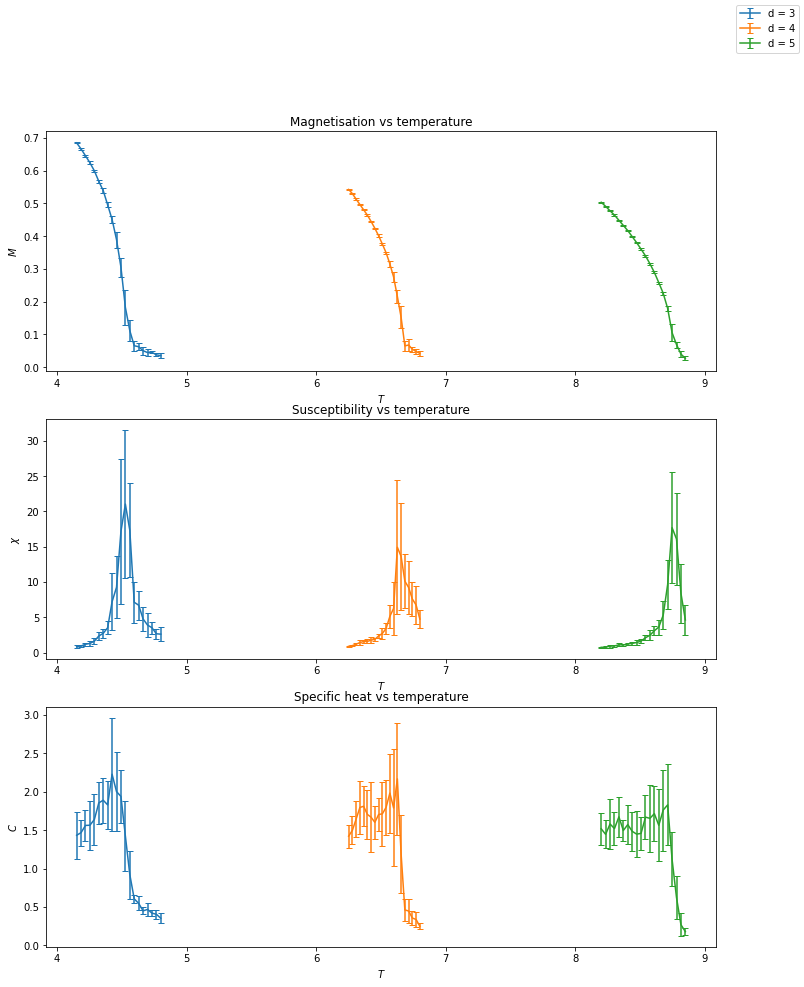

In [15]:
K = 10
n = 200
ds = [3, 4, 5]
Ns = [26, 14, 10]
T_steps = 20

Ts_3 = np.linspace(4.15, 4.8, T_steps)
Ts_4 = np.linspace(6.25, 6.8, T_steps)
Ts_5 = np.linspace(8.2, 8.85, T_steps)
Ts_d = [Ts_3, Ts_4, Ts_5]

stats_d, errs_d = [], []
fig, ax = plt.subplots(3)
for d, N, Ts in zip(ds, Ns, Ts_d):
    stats, errs = [], []
    l = Lattice(int(N), d=d, K=K)
    stats, errs = l.crit_data(Ts, n=n, t0=100)
    stats_d.append(stats), errs_d.append(errs)
    print(d)
    for i in range(3):
        ax[i].errorbar(Ts, stats[i], errs[i], capsize=3)

ax[0].set_title("Magnetisation vs temperature"), ax[1].set_title("Susceptibility vs temperature"), ax[2].set_title("Specific heat vs temperature")
ax[0].set_xlabel("$T$"), ax[1].set_xlabel("$T$"), ax[2].set_xlabel("$T$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$\chi$"), ax[2].set_ylabel("$C$")
fig.legend(["d = " + str(d) for d in ds])
fig.set_size_inches(12, 15)

#np.savez('data/higher_dims2.npz', stats_d=stats_d, errs_d=errs_d)

# Nice Plots

In [19]:
ds = [3, 4, 5]
Ns = [30, 16, 10]
Ts_d = [np.linspace(2*d-3.5, 2*d-0.5, 30) for d in ds]

stats_d = np.load('data/higher_dims.npz')['stats_d']
errs_d = np.load('data/higher_dims.npz')['errs_d']
stats_d[0].shape

(3, 30)

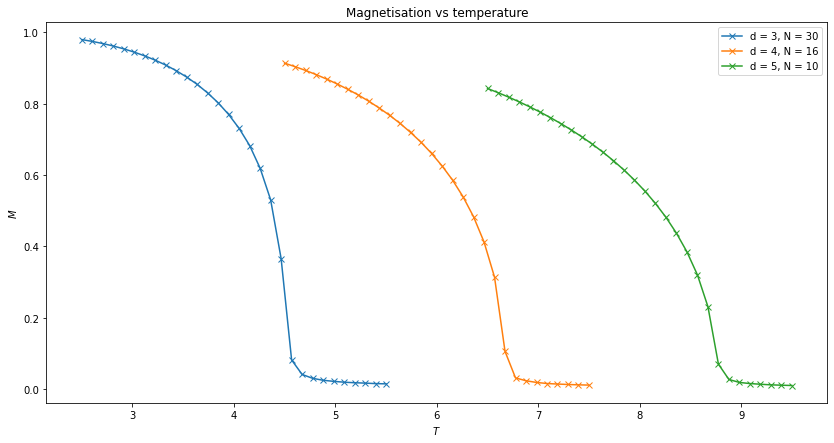

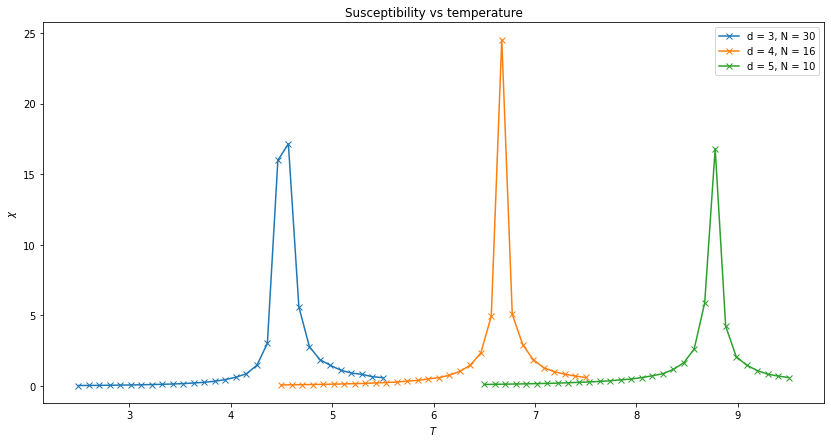

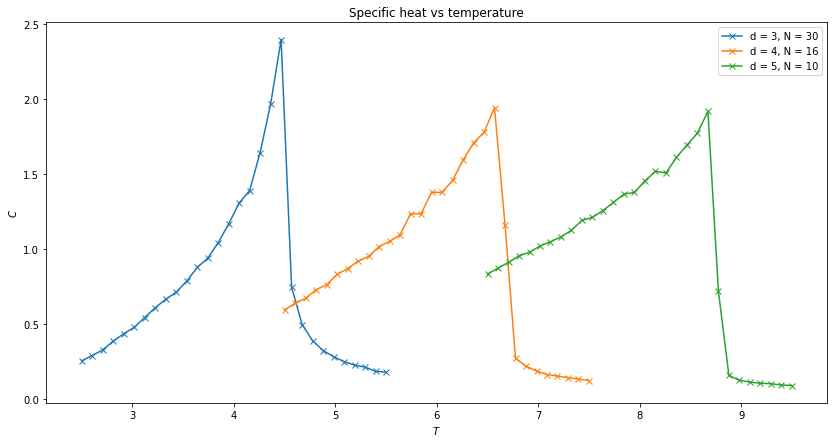

In [43]:
fig, ax = zip(*[plt.subplots() for _ in range(3)])

for stats, errs, Ts in zip(stats_d, errs_d, Ts_d):
    for a, stat, err in zip(ax, stats, errs):
        a.plot(Ts, stat, marker='x')

ax[0].set_title("Magnetisation vs temperature"), ax[1].set_title("Susceptibility vs temperature"), ax[2].set_title("Specific heat vs temperature")
ax[0].set_xlabel("$T$"), ax[1].set_xlabel("$T$"), ax[2].set_xlabel("$T$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$\chi$"), ax[2].set_ylabel("$C$")
for a, f, l in zip(ax, fig, ['M', "Chi", 'C']):
    a.legend([f'{d = }' + ", " + f'{N = }' for d, N in zip(ds,Ns)])
    f.set_size_inches(14, 7)
    plt.savefig
#fig.set_size_inches(21, 6)